# About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

# Problem


Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

# Variable Description


Loan_ID - Unique Loan ID

Gender - Male/ Female

Married - Applicant married (Y/N)

Dependents -Number of dependents

Education - Applicant Education (Graduate/ Under Graduate)

Self_Employed - Self employed (Y/N)

ApplicantIncome - Applicant income

CoapplicantIncome -Coapplicant income

LoanAmount - Loan amount in thousands

Loan_Amount_Term - Term of loan in months

Credit_History - credit history meets guidelines

Property_Area - Urban/ Semi Urban/ Rural

Loan_Status - Loan approved (Y/N)

#### Importing Libraries

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [155]:
data=pd.read_csv(r'C:\Users\Parth Anand\Downloads\hackathontrain.csv')

In [156]:
data.shape

(614, 13)

In [157]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Checking Missing Values

In [158]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### 1. Missing value in applicant Gender

In [159]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [160]:
#filling missing values in Gender with mode
data['Gender'].fillna(value='Male',inplace=True)

#### 2. Missing value in applicant martial status

In [161]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [162]:
#filling missing values in Married status with mode
data['Married'].fillna(value='Yes',inplace=True)

#### 3. Missing value in applicant Dependents

In [163]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [164]:
#filling with mode
data['Dependents'].fillna(value=0,inplace=True)

#### 4. Missing values in applicant Self Employed status

In [165]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [166]:
#filling with mode
data['Self_Employed'].fillna(value='No',inplace=True)

#### 5. Missing values in Loan Amount variable

In [167]:
data['LoanAmount'].mean()

146.41216216216216

In [168]:
#filling missing values in Loan Amount with mean
data['LoanAmount'].fillna(value=146,inplace=True)

#### 6. Missing values in Loan_Amount_Term

In [169]:
data['Loan_Amount_Term'].mean()

342.0

In [170]:
#filling missing values in Loan_Amount_Term with mean
data['Loan_Amount_Term'].fillna(value=342.0,inplace=True)

#### 7. Missing values in credit score


In [171]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [172]:
#filling with mode
data['Credit_History'].fillna(value=1.0,inplace=True)

In [173]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

No Missing Value remaining

# Data Types

In [174]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

All data types are correct

# Model Building

In [175]:
df=data.drop(['Loan_ID','Loan_Status'],axis=1)

In [176]:
df=pd.get_dummies(df)

In [177]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.0,360.0,1.0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1


In [178]:
#splitting data into dependent and independent variables
x=df
y=data['Loan_Status']

# Scaling the data (Using MinMax Scaler)


In [179]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [180]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [181]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.070489,0.000000,0.198263,0.74359,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.054830,0.036192,0.172214,0.74359,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.035250,0.000000,0.082489,0.74359,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.030093,0.056592,0.160637,0.74359,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.072356,0.000000,0.191027,0.74359,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [182]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56, stratify=y)

# Implementing KNN Classifier 

In [183]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

In [184]:
# Creating instance of KNN
clf = KNN(n_neighbors = 10)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Test Set and calculating accuracy_score
test_predict = clf.predict(test_x)
k = accuracy_score(test_predict, test_y)
print('Test Accuracy Score    ', k )

Test Accuracy Score     0.7077922077922078


# Elbow for Classifier

In [185]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending accuracy scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = accuracy_score(tmp,test_y)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [186]:
#Defining K range
k = range(6, 20, 2)

In [187]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

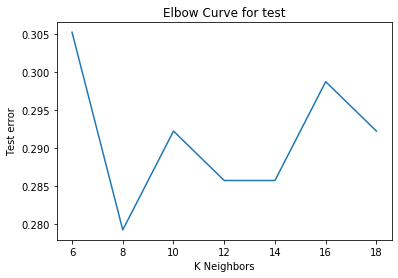

In [188]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

best value of k would be 8

In [197]:
# Creating instance of KNN
clf = KNN(n_neighbors = 8)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculatinng accuracy score
pred1=clf.predict(test_x)
k = accuracy_score(pred1, test_y)
print('Test accuracy Score    ', k )

Test accuracy Score     0.7207792207792207


# Logistic Regression

In [190]:
from sklearn.linear_model import LogisticRegression

In [191]:
model2 = LogisticRegression()
model2.fit(train_x,train_y)
pred2=model2.predict(test_x)
pred2[:10], model1.score(test_x, test_y)

(array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y'], dtype=object),
 0.7662337662337663)

# Decision Tree

In [192]:
from sklearn.tree import DecisionTreeClassifier

In [193]:
model3 = DecisionTreeClassifier(max_depth=4)
model3.fit(train_x,train_y)
pred3=model3.predict(test_x)
pred3[:10], model3.score(test_x, test_y)

(array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y'], dtype=object),
 0.7727272727272727)

# Ensemble Modelling

In [194]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(test_x)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

In [195]:
accuracy_score(test_y, final_pred)

0.7662337662337663